In [ ]:
# coding:utf8

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [1]:
"""

基于pytorch框架编写模型训练
实现一个自行构造的找规律(机器学习)任务
规律：x是一个5维向量，如果第1个数>第5个数，则为正样本，反之为负样本

"""
class TorchModel(nn.Module):
    def __init__(self, input_size):
        super(TorchModel, self).__init__()
        self.linear = nn.Linear(input_size, 5)  # 线性层
        self.loss = nn.functional.cross_entropy  # 

    # 当输入真实标签，返回loss值；无真实标签，返回预测值
    def forward(self, x, y=None):
        y_pred = self.linear(x)  # (batch_size, input_size) -> (batch_size, 1)
        if y is not None:
            print("预测值",y_pred.shape)
            print("期望值",y.shape)
            return self.loss(y_pred, y)  # 预测值和真实值计算损失
        else:
            return y_pred  # 输出预测结果



NameError: name 'nn' is not defined

In [15]:
# 生成一个样本, 样本的生成方法，代表了我们要学习的规律
# 随机生成一个5维向量，如果第一个值大于第五个值，认为是正样本，反之为负样本
def build_sample():
    x =np.random.random(5)
    max_index = np.argmax(x, axis=0)
    return x,max_index


# 随机生成一批样本
# 正负样本均匀生成
def build_dataset(total_sample_num):
    X = []
    Y = []
    for i in range(total_sample_num):
        x, y = build_sample()
        X.append(x)
        Y.append(y) # 交叉商这里要改成单个输出
    return torch.FloatTensor(X), torch.LongTensor(Y)
build_dataset(2)

(tensor([[0.0395, 0.1091, 0.3735, 0.0228, 0.6640],
         [0.4528, 0.8184, 0.6444, 0.8938, 0.1262]]),
 tensor([4, 3]))

In [16]:
# 测试代码
# 用来测试每轮模型的准确率
def evaluate(model):
    model.eval()
    test_sample_num = 100
    x, y = build_dataset(test_sample_num)
    print("本次预测集中共有%d个正样本，%d个负样本" % (sum(y), test_sample_num - sum(y)))
    correct, wrong = 0, 0
    with torch.no_grad():
        y_pred = model(x)  # 模型预测 ,没有y就是得到预测值
        for y_p, y_t in zip(y_pred, y):  # 与真实标签进行对比
            if  torch.argmax(y_p) == int(y_t): 
                correct += 1  # 负样本判断正确
            else:
                wrong += 1
    print("正确预测个数：%d, 正确率：%f" % (correct, correct / (correct + wrong)))
    return correct / (correct + wrong)

In [17]:
def main():
    # 配置参数
    epoch_num = 20  # 训练轮数
    batch_size = 20  # 每次训练样本个数
    train_sample = 5000  # 每轮训练总共训练的样本总数
    input_size = 5  # 输入向量维度
    learning_rate = 0.01  # 学习率
    # 建立模型
    model = TorchModel(input_size)
    # 选择优化器
    optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
    log = []
    # 创建训练集，正常任务是读取训练集
    train_x, train_y = build_dataset(train_sample)
    # 训练过程
    for epoch in range(epoch_num):
        model.train()
        watch_loss = []
        for batch_index in range(train_sample // batch_size):    
            x = train_x[batch_index * batch_size : (batch_index + 1) * batch_size]
            y = train_y[batch_index * batch_size : (batch_index + 1) * batch_size]
            loss = model(x, y)  # 计算loss
            loss.backward()  # 计算梯度
            optim.step()  # 更新权重
            optim.zero_grad()  # 梯度归零
            watch_loss.append(loss.item())
        print("=========\n第%d轮平均loss:%f" % (epoch + 1, np.mean(watch_loss)))
        acc = evaluate(model)  # 测试本轮模型结果
        log.append([acc, float(np.mean(watch_loss))])
    # 保存模型
    torch.save(model.state_dict(), "D:\code\python\myNLPClass\week2\model.pt")
    # 画图
    print(log)
    plt.plot(range(len(log)), [l[0] for l in log], label="acc")  # 画acc曲线
    plt.plot(range(len(log)), [l[1] for l in log], label="loss")  # 画loss曲线
    plt.legend()
    plt.show()
    return

预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.Size([20, 5])
期望值 torch.Size([20])
预测值 torch.

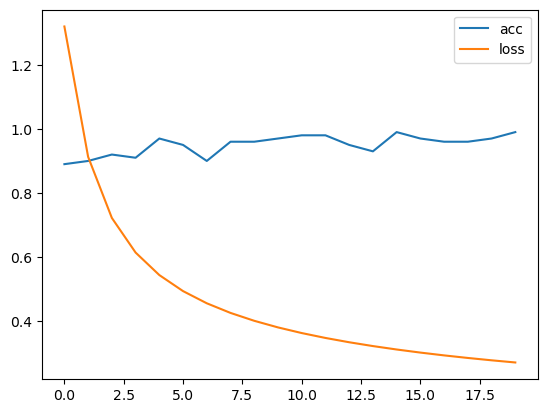

In [18]:


# 使用训练好的模型做预测
def predict(model_path, input_vec):
    input_size = 5
 
    model = TorchModel(input_size)
    model.load_state_dict(torch.load(model_path))  # 加载训练好的权重
    print(model.state_dict())

    model.eval()  # 测试模式
    with torch.no_grad():  # 不计算梯度
        result = model.forward(torch.FloatTensor(input_vec))  # 模型预测
    for vec, res in zip(input_vec, result):
        print("输入：%s, 预测类别：%d, 概率值：%f" % (vec, round(float(res)), res))  # 打印结果


if __name__ == "__main__":
    main()
    # test_vec = [[0.07889086 ,0.15229675,0.31082123,0.03504317,0.18920843],
    #             [0.94963533,0.5524256,0.95758807,0.95520434,0.84890681],
    #             [0.78797868,0.67482528,0.13625847,0.34675372,0.19871392],
    #             [0.79349776,0.59416669,0.92579291,0.41567412,0.1358894]]
    # predict("D:\code\python\myNLPClass\week2\model.pt", test_vec)
